# DATA PREPROCESSING

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'


### Veri Setinin Upload Edilmesi

In [2]:
df = pd.read_csv('../../data/zingat_ist_raw.csv', low_memory=False)

In [3]:
df

,Unnamed: 0,Net m²,Brüt m²,Krediye Uygun,Binadaki Kat Sayısı,Isıtma Tipi,Bulunduğu Kat,Bina Yaşı,Mobilya Durumu,Kullanım Durumu,...,Usage Status,Maintenance Fee,Rental Income,Suitable for Bank Loan,Unit Exchange,Fiyat,İl,İlçe,Mahalle,Oda
0,0,375,400m²,Hayır,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13500000,İstanbul,Adalar,Maden,5 + 2
1,1,100,110m²,Evet,3,Kombi (Doğalgaz),3,31-35 arası,Sadece Beyaz Eşya,Boş,...,NaN,NaN,NaN,NaN,NaN,2750000,İstanbul,Adalar,Heybeliada,3 + 1
2,2,88,103m²,Evet,4,Fancoil,2,6-10 arası,Sadece Beyaz Eşya,Kiracılı,...,NaN,NaN,NaN,NaN,NaN,7500000,İstanbul,Adalar,Nizam,2 + 1
3,3,100,112m²,Evet,4,Fancoil,1,6-10 arası,Sadece Beyaz Eşya,Kiracılı,...,NaN,NaN,NaN,NaN,NaN,7500000,İstanbul,Adalar,Nizam,2 + 1
4,4,75,90m²,Evet,4,Fancoil,3,6-10 arası,Sadece Beyaz Eşya,Kiracılı,...,NaN,NaN,NaN,NaN,NaN,7500000,İstanbul,Adalar,Nizam,1 + 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16549,16549,162,260m²,Hayır,10-20 arası,Merkezi Sistem (Isı Payı Ölçer),2,0,Eşyalı (Mobilyalı),Mülk Sahibi,...,NaN,NaN,NaN,NaN,NaN,7500000,İstanbul,Zeytinburnu,Merkezefendi,2 + 1
16550,16550,120,130m²,Hayır,9,Merkezi Sistem (Isı Payı Ölçer),8,11-15 arası,Eşyasız,Kiracılı,...,NaN,NaN,NaN,NaN,NaN,4000000,İstanbul,Zeytinburnu,Maltepe,2 + 1
16551,16551,100,131m²,Evet,10,Merkezi Sistem (Isı Payı Ölçer),9,6-10 arası,Eşyasız,Kiracılı,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16552,16552,100,131m²,Evet,10,Merkezi Sistem (Isı Payı Ölçer),9,6-10 arası,Eşyasız,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df[df["İl"]=="İstanbul"]

### Eşik Değer Belirlenmesi

Eşik değer ile veri setinin kolonlarında bu belirlenen eşik değerin altında kalan dummy data'ların threshold (eşik değer) kadar olanı silinir. Örneğin threshold 0.6 için veri setindeki kolonlarda %40'a kadar veri anlamsız veya null olduğu için silinir.

In [5]:
threshold = 0.6
df = df[df.columns[df.isnull().mean() < threshold]]

In [6]:
df

,Unnamed: 0,Net m²,Brüt m²,Krediye Uygun,Binadaki Kat Sayısı,Isıtma Tipi,Bulunduğu Kat,Bina Yaşı,Mobilya Durumu,Kullanım Durumu,Fiyat,İl,İlçe,Mahalle,Oda
0,0,375,400m²,Hayır,NaN,NaN,NaN,NaN,NaN,NaN,13500000,İstanbul,Adalar,Maden,5 + 2
1,1,100,110m²,Evet,3,Kombi (Doğalgaz),3,31-35 arası,Sadece Beyaz Eşya,Boş,2750000,İstanbul,Adalar,Heybeliada,3 + 1
2,2,88,103m²,Evet,4,Fancoil,2,6-10 arası,Sadece Beyaz Eşya,Kiracılı,7500000,İstanbul,Adalar,Nizam,2 + 1
3,3,100,112m²,Evet,4,Fancoil,1,6-10 arası,Sadece Beyaz Eşya,Kiracılı,7500000,İstanbul,Adalar,Nizam,2 + 1
4,4,75,90m²,Evet,4,Fancoil,3,6-10 arası,Sadece Beyaz Eşya,Kiracılı,7500000,İstanbul,Adalar,Nizam,1 + 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,16546,70,93m²,Evet,10-20 arası,Klima,12,1,Sadece Beyaz Eşya,Boş,25000000,İstanbul,Zeytinburnu,Kazlıçeşme,3 + 1
16547,16547,120,135m²,Evet,3,Kombi (Doğalgaz),2,0,Eşyasız,Boş,7770000,İstanbul,Zeytinburnu,Seyitnizam,2 + 1
16548,16548,135,197m²,Evet,10-20 arası,Merkezi Sistem (Isı Payı Ölçer),11,1,Eşyasız,Kiracılı,7500000,İstanbul,Zeytinburnu,Merkezefendi,2 + 1
16549,16549,162,260m²,Hayır,10-20 arası,Merkezi Sistem (Isı Payı Ölçer),2,0,Eşyalı (Mobilyalı),Mülk Sahibi,7500000,İstanbul,Zeytinburnu,Merkezefendi,2 + 1


  >*40 kolondan 15 kolona düştü*

In [7]:
df.columns

Index(['Unnamed: 0', 'Net m²', 'Brüt m²', 'Krediye Uygun',
       'Binadaki Kat Sayısı', 'Isıtma Tipi', 'Bulunduğu Kat', 'Bina Yaşı',
       'Mobilya Durumu', 'Kullanım Durumu', 'Fiyat', 'İl', 'İlçe', 'Mahalle',
       'Oda'],
      dtype='object')

###### Silinmemiş işe yaramayan 'Unnamed: 0' kolonu da silinir.

In [8]:
df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [9]:
df.head()

,Net m²,Brüt m²,Krediye Uygun,Binadaki Kat Sayısı,Isıtma Tipi,Bulunduğu Kat,Bina Yaşı,Mobilya Durumu,Kullanım Durumu,Fiyat,İl,İlçe,Mahalle,Oda
0,375,400m²,Hayır,NaN,NaN,NaN,NaN,NaN,NaN,13500000,İstanbul,Adalar,Maden,5 + 2
1,100,110m²,Evet,3,Kombi (Doğalgaz),3,31-35 arası,Sadece Beyaz Eşya,Boş,2750000,İstanbul,Adalar,Heybeliada,3 + 1
2,88,103m²,Evet,4,Fancoil,2,6-10 arası,Sadece Beyaz Eşya,Kiracılı,7500000,İstanbul,Adalar,Nizam,2 + 1
3,100,112m²,Evet,4,Fancoil,1,6-10 arası,Sadece Beyaz Eşya,Kiracılı,7500000,İstanbul,Adalar,Nizam,2 + 1
4,75,90m²,Evet,4,Fancoil,3,6-10 arası,Sadece Beyaz Eşya,Kiracılı,7500000,İstanbul,Adalar,Nizam,1 + 1


### Satırlardaki verilerin düzenlenmesi 

In [10]:
df

,Net m²,Brüt m²,Krediye Uygun,Binadaki Kat Sayısı,Isıtma Tipi,Bulunduğu Kat,Bina Yaşı,Mobilya Durumu,Kullanım Durumu,Fiyat,İl,İlçe,Mahalle,Oda
0,375,400m²,Hayır,NaN,NaN,NaN,NaN,NaN,NaN,13500000,İstanbul,Adalar,Maden,5 + 2
1,100,110m²,Evet,3,Kombi (Doğalgaz),3,31-35 arası,Sadece Beyaz Eşya,Boş,2750000,İstanbul,Adalar,Heybeliada,3 + 1
2,88,103m²,Evet,4,Fancoil,2,6-10 arası,Sadece Beyaz Eşya,Kiracılı,7500000,İstanbul,Adalar,Nizam,2 + 1
3,100,112m²,Evet,4,Fancoil,1,6-10 arası,Sadece Beyaz Eşya,Kiracılı,7500000,İstanbul,Adalar,Nizam,2 + 1
4,75,90m²,Evet,4,Fancoil,3,6-10 arası,Sadece Beyaz Eşya,Kiracılı,7500000,İstanbul,Adalar,Nizam,1 + 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,70,93m²,Evet,10-20 arası,Klima,12,1,Sadece Beyaz Eşya,Boş,25000000,İstanbul,Zeytinburnu,Kazlıçeşme,3 + 1
16547,120,135m²,Evet,3,Kombi (Doğalgaz),2,0,Eşyasız,Boş,7770000,İstanbul,Zeytinburnu,Seyitnizam,2 + 1
16548,135,197m²,Evet,10-20 arası,Merkezi Sistem (Isı Payı Ölçer),11,1,Eşyasız,Kiracılı,7500000,İstanbul,Zeytinburnu,Merkezefendi,2 + 1
16549,162,260m²,Hayır,10-20 arası,Merkezi Sistem (Isı Payı Ölçer),2,0,Eşyalı (Mobilyalı),Mülk Sahibi,7500000,İstanbul,Zeytinburnu,Merkezefendi,2 + 1


**Brüt m²** kolonunu altındaki verilerin sonundaki (suffix) m² karakterlerinin kaldırılır.

In [11]:
df['Brüt m²'] = df['Brüt m²'].replace('m²', '', regex=True)

In [12]:
df

,Net m²,Brüt m²,Krediye Uygun,Binadaki Kat Sayısı,Isıtma Tipi,Bulunduğu Kat,Bina Yaşı,Mobilya Durumu,Kullanım Durumu,Fiyat,İl,İlçe,Mahalle,Oda
0,375,400,Hayır,NaN,NaN,NaN,NaN,NaN,NaN,13500000,İstanbul,Adalar,Maden,5 + 2
1,100,110,Evet,3,Kombi (Doğalgaz),3,31-35 arası,Sadece Beyaz Eşya,Boş,2750000,İstanbul,Adalar,Heybeliada,3 + 1
2,88,103,Evet,4,Fancoil,2,6-10 arası,Sadece Beyaz Eşya,Kiracılı,7500000,İstanbul,Adalar,Nizam,2 + 1
3,100,112,Evet,4,Fancoil,1,6-10 arası,Sadece Beyaz Eşya,Kiracılı,7500000,İstanbul,Adalar,Nizam,2 + 1
4,75,90,Evet,4,Fancoil,3,6-10 arası,Sadece Beyaz Eşya,Kiracılı,7500000,İstanbul,Adalar,Nizam,1 + 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,70,93,Evet,10-20 arası,Klima,12,1,Sadece Beyaz Eşya,Boş,25000000,İstanbul,Zeytinburnu,Kazlıçeşme,3 + 1
16547,120,135,Evet,3,Kombi (Doğalgaz),2,0,Eşyasız,Boş,7770000,İstanbul,Zeytinburnu,Seyitnizam,2 + 1
16548,135,197,Evet,10-20 arası,Merkezi Sistem (Isı Payı Ölçer),11,1,Eşyasız,Kiracılı,7500000,İstanbul,Zeytinburnu,Merkezefendi,2 + 1
16549,162,260,Hayır,10-20 arası,Merkezi Sistem (Isı Payı Ölçer),2,0,Eşyalı (Mobilyalı),Mülk Sahibi,7500000,İstanbul,Zeytinburnu,Merkezefendi,2 + 1


**Binadaki Kat Sayısı** kolonunun altında bulunan satırlardaki yinelemeyen / benzersiz veriler elde edilip bu kolonun altındaki veriler düzenlenir.

In [13]:
df["Binadaki Kat Sayısı"].unique()

array([nan, '3', '4', '2', '5', '7', '10', '1', '10-20 arası', '6',
       '20 ve üzeri', '8', 'Between 10-20', '9'], dtype=object)

In [14]:
df.loc[df["Binadaki Kat Sayısı"] == "10-20 arası" , "Binadaki Kat Sayısı"] = 15
df.loc[df["Binadaki Kat Sayısı"] == "20 ve üzeri" , "Binadaki Kat Sayısı"] = 20

df.loc[df["Binadaki Kat Sayısı"] == "Between 10-20" , "Binadaki Kat Sayısı"] = 15
df.loc[df["Binadaki Kat Sayısı"] == "20+" , "Binadaki Kat Sayısı"] = 20

In [15]:
df

,Net m²,Brüt m²,Krediye Uygun,Binadaki Kat Sayısı,Isıtma Tipi,Bulunduğu Kat,Bina Yaşı,Mobilya Durumu,Kullanım Durumu,Fiyat,İl,İlçe,Mahalle,Oda
0,375,400,Hayır,NaN,NaN,NaN,NaN,NaN,NaN,13500000,İstanbul,Adalar,Maden,5 + 2
1,100,110,Evet,3,Kombi (Doğalgaz),3,31-35 arası,Sadece Beyaz Eşya,Boş,2750000,İstanbul,Adalar,Heybeliada,3 + 1
2,88,103,Evet,4,Fancoil,2,6-10 arası,Sadece Beyaz Eşya,Kiracılı,7500000,İstanbul,Adalar,Nizam,2 + 1
3,100,112,Evet,4,Fancoil,1,6-10 arası,Sadece Beyaz Eşya,Kiracılı,7500000,İstanbul,Adalar,Nizam,2 + 1
4,75,90,Evet,4,Fancoil,3,6-10 arası,Sadece Beyaz Eşya,Kiracılı,7500000,İstanbul,Adalar,Nizam,1 + 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,70,93,Evet,15,Klima,12,1,Sadece Beyaz Eşya,Boş,25000000,İstanbul,Zeytinburnu,Kazlıçeşme,3 + 1
16547,120,135,Evet,3,Kombi (Doğalgaz),2,0,Eşyasız,Boş,7770000,İstanbul,Zeytinburnu,Seyitnizam,2 + 1
16548,135,197,Evet,15,Merkezi Sistem (Isı Payı Ölçer),11,1,Eşyasız,Kiracılı,7500000,İstanbul,Zeytinburnu,Merkezefendi,2 + 1
16549,162,260,Hayır,15,Merkezi Sistem (Isı Payı Ölçer),2,0,Eşyalı (Mobilyalı),Mülk Sahibi,7500000,İstanbul,Zeytinburnu,Merkezefendi,2 + 1


**Isıtma Tipi** kolonunun altında bulunan satırlardaki yinelemeyen / benzersiz veriler elde edilip bu kolonun altındaki veriler düzenlenir.

In [16]:
df["Isıtma Tipi"].unique()

array([nan, 'Kombi (Doğalgaz)', 'Fancoil', 'Klima',
       'Kalorifer (Doğalgaz)', 'Kombi (Elektrikli)', 'Kat Kaloriferi',
       'Merkezi Sistem (Isı Payı Ölçer)', 'Yerden Isıtma',
       'Combi Boiler (Natural Gas)', 'Merkezi Sistem',
       'Central System (Heat Share Meter)', 'Central System',
       'Soba (Doğalgaz)', 'Yok', 'Soba (Kömür)', 'Air Conditioner',
       'Güneş Enerjisi', 'Floor Heating'], dtype=object)

In [17]:
df.loc[df["Isıtma Tipi"] == "-" , "Isıtma Tipi"] = 0
df.loc[df["Isıtma Tipi"] == "Yok" , "Isıtma Tipi"] = 0

df.loc[df["Isıtma Tipi"] == "Soba (Doğalgaz)" , "Isıtma Tipi"] = 1
df.loc[df["Isıtma Tipi"] == "Soba (Kömür)" , "Isıtma Tipi"] = 1

df.loc[df["Isıtma Tipi"] == "Merkezi Sistem" , "Isıtma Tipi"] = 2
df.loc[df["Isıtma Tipi"] == "Kat Kaloriferi" , "Isıtma Tipi"] = 2
df.loc[df["Isıtma Tipi"] == "Merkezi Sistem (Isı Payı Ölçer)" , "Isıtma Tipi"] = 2
df.loc[df["Isıtma Tipi"] == "Kombi (Doğalgaz)" , "Isıtma Tipi"] = 2
df.loc[df["Isıtma Tipi"] == "Kalorifer (Doğalgaz)" , "Isıtma Tipi"] = 2
df.loc[df["Isıtma Tipi"] == "Kombi (Elektrikli)" , "Isıtma Tipi"] = 2
df.loc[df["Isıtma Tipi"] == "Kalorifer (Akaryakıt)" , "Isıtma Tipi"] = 2
df.loc[df["Isıtma Tipi"] == "Kalorifer (Kömür)" , "Isıtma Tipi"] = 2

df.loc[df["Isıtma Tipi"] == "Yerden Isıtma" , "Isıtma Tipi"] = 3
df.loc[df["Isıtma Tipi"] == "Güneş Enerjisi" , "Isıtma Tipi"] = 3
df.loc[df["Isıtma Tipi"] == "Jeotermal" , "Isıtma Tipi"] = 3
df.loc[df["Isıtma Tipi"] == "Klima" , "Isıtma Tipi"] = 3


df.loc[df["Isıtma Tipi"] == "None" , "Isıtma Tipi"] = 0

df.loc[df["Isıtma Tipi"] == "Stove (Natural Gas)" , "Isıtma Tipi"] = 1
df.loc[df["Isıtma Tipi"] == "Stove (Coal)" , "Isıtma Tipi"] = 1

df.loc[df["Isıtma Tipi"] == "Central System" , "Isıtma Tipi"] = 2
df.loc[df["Isıtma Tipi"] == "Central Heating (Natural Gas)" , "Isıtma Tipi"] = 2
df.loc[df["Isıtma Tipi"] == "Central System (Heat Share Meter)" , "Isıtma Tipi"] = 2
df.loc[df["Isıtma Tipi"] == "Fancoil" , "Isıtma Tipi"] = 2
df.loc[df["Isıtma Tipi"] == "Independent Boiler" , "Isıtma Tipi"] = 2
df.loc[df["Isıtma Tipi"] == "Combi Boiler (Natural Gas)" , "Isıtma Tipi"] = 2
df.loc[df["Isıtma Tipi"] == "Combi Boiler (Electric)" , "Isıtma Tipi"] = 2
df.loc[df["Isıtma Tipi"] == "Central Heating (Coal)" , "Isıtma Tipi"] = 2

df.loc[df["Isıtma Tipi"] == "Floor Heating" , "Isıtma Tipi"] = 3
df.loc[df["Isıtma Tipi"] == "Solar Power" , "Isıtma Tipi"] = 3
df.loc[df["Isıtma Tipi"] == "Geothermal" , "Isıtma Tipi"] = 3
df.loc[df["Isıtma Tipi"] == "Air Conditioner" , "Isıtma Tipi"] = 3

df["Isıtma Tipi"] = df["Isıtma Tipi"].fillna("0")

In [18]:
df

,Net m²,Brüt m²,Krediye Uygun,Binadaki Kat Sayısı,Isıtma Tipi,Bulunduğu Kat,Bina Yaşı,Mobilya Durumu,Kullanım Durumu,Fiyat,İl,İlçe,Mahalle,Oda
0,375,400,Hayır,NaN,0,NaN,NaN,NaN,NaN,13500000,İstanbul,Adalar,Maden,5 + 2
1,100,110,Evet,3,2,3,31-35 arası,Sadece Beyaz Eşya,Boş,2750000,İstanbul,Adalar,Heybeliada,3 + 1
2,88,103,Evet,4,2,2,6-10 arası,Sadece Beyaz Eşya,Kiracılı,7500000,İstanbul,Adalar,Nizam,2 + 1
3,100,112,Evet,4,2,1,6-10 arası,Sadece Beyaz Eşya,Kiracılı,7500000,İstanbul,Adalar,Nizam,2 + 1
4,75,90,Evet,4,2,3,6-10 arası,Sadece Beyaz Eşya,Kiracılı,7500000,İstanbul,Adalar,Nizam,1 + 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,70,93,Evet,15,3,12,1,Sadece Beyaz Eşya,Boş,25000000,İstanbul,Zeytinburnu,Kazlıçeşme,3 + 1
16547,120,135,Evet,3,2,2,0,Eşyasız,Boş,7770000,İstanbul,Zeytinburnu,Seyitnizam,2 + 1
16548,135,197,Evet,15,2,11,1,Eşyasız,Kiracılı,7500000,İstanbul,Zeytinburnu,Merkezefendi,2 + 1
16549,162,260,Hayır,15,2,2,0,Eşyalı (Mobilyalı),Mülk Sahibi,7500000,İstanbul,Zeytinburnu,Merkezefendi,2 + 1


**Bulunduğu Kat** kolonunun altında bulunan satırlardaki yinelemeyen / benzersiz veriler elde edilip bu kolonun altındaki veriler düzenlenir.

In [19]:
df["Bulunduğu Kat"].unique()

array([nan, '3', '2', '1', 'Yüksek Giriş', 'Zemin Kat', 'En Üst Kat',
       'Kot 2', 'Komple', 'Bahçe katı', '4', 'Kot 1', 'Kot 4',
       'Giriş Katı', 'Bodrum Kat', '7', 'Çatı Katı', '6', '11',
       'Müstakil', '9', '17', '15', '16', '20 ve üzeri', '8', '5', '13',
       '18', '14', '10', '12', '19', 'Elevation 4', 'Teras Kat', 'Kot 3',
       'Garden Floor', 'First Floor', 'Raised First Floor', 'Detached',
       'Ground Floor'], dtype=object)

*Bulunduğu Kat kolonunun altındaki En Üst Kat değerine sahip verileri getirir* 

In [20]:
df[df["Bulunduğu Kat"] == 'Kot 1']

,Net m²,Brüt m²,Krediye Uygun,Binadaki Kat Sayısı,Isıtma Tipi,Bulunduğu Kat,Bina Yaşı,Mobilya Durumu,Kullanım Durumu,Fiyat,İl,İlçe,Mahalle,Oda
26,150,170,Evet,3,2,Kot 1,36-40 arası,Eşyasız,Boş,8100000,İstanbul,Adalar,Nizam,4 + 1
490,80,90,Evet,4,2,Kot 1,11-15 arası,Eşyalı (Mobilyalı),Boş,1500000,İstanbul,Ataşehir,İnönü,2 + 1
793,90,100,Hayır,5,2,Kot 1,21-25 arası,Eşyasız,Mülk Sahibi,840000,İstanbul,Avcılar,Cihangir,2 + 1
839,80,90,Evet,4,2,Kot 1,4,Eşyasız,Kiracılı,1550000,İstanbul,Avcılar,Firuzköy,2 + 1
964,103,203,Hayır,15,2,Kot 1,NaN,Eşyasız,NaN,7855000,İstanbul,Avcılar,Tahtakale,4 + 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15860,65,80,Evet,4,2,Kot 1,6-10 arası,NaN,Boş,1395000,İstanbul,Üsküdar,Valide-i Atik,1 + 1
15945,60,70,Evet,4,2,Kot 1,40 ve üzeri,Eşyasız,Kiracılı,1600000,İstanbul,Üsküdar,Selami Ali,2 + 1
15993,80,115,Evet,5,2,Kot 1,4,Eşyasız,Boş,37000000,İstanbul,Üsküdar,Salacak,4 + 1
16382,85,95,Evet,15,2,Kot 1,5,Eşyasız,Kiracılı,3200000,İstanbul,Zeytinburnu,Telsiz,4 + 2


> *Bu veriler sayesinde Kot 1'de bulunan dairelerin ilanlarına ulaştım ve Kot 1'de bulunan dairelerin ilanlarında geçen dairelerin gerçekte kot 1'de olmadığını farkettim. Bu yüzden Kot 1 değerine sahip sütunları None olarak adlandırdım. Böylelikle Null değerler ile birlikte bu işe yaramayan satırlar da silinmiş oldu. 
Yalan ve az veri barındıran bazı diğer 'Bulunduğu Kat' değerleri:*
    >* Kot 1 
    >* Kot 2 
    >* Kot 3 
    >* Kot 4 
    >* Müstakil 
    >* Detached
    >* Elevation 1
    >* Elevation 4
    >* Raised First Floor
    >* Komple
    >* First Floor
    >* Garden Floor
    >* Top Floor


In [21]:
df.loc[df["Bulunduğu Kat"]== "Yüksek Giriş", "Bulunduğu Kat"] = 1

df.loc[df["Bulunduğu Kat"]== "Bodrum Kat", "Bulunduğu Kat"] = -1

df.loc[df["Bulunduğu Kat"]== "En Üst Kat", "Bulunduğu Kat"] = df["Binadaki Kat Sayısı"]
df.loc[df["Bulunduğu Kat"]== "Teras Kat", "Bulunduğu Kat"] = df["Binadaki Kat Sayısı"]
df.loc[df["Bulunduğu Kat"]== "Çatı Katı", "Bulunduğu Kat"] = df["Binadaki Kat Sayısı"]

df.loc[df["Bulunduğu Kat"]== "Ground Floor", "Bulunduğu Kat"] = 0
df.loc[df["Bulunduğu Kat"]== "Zemin Kat", "Bulunduğu Kat"] = 0
df.loc[df["Bulunduğu Kat"]== "Bahçe katı", "Bulunduğu Kat"] = 0
df.loc[df["Bulunduğu Kat"]== "Giriş Katı", "Bulunduğu Kat"] = 0

df.loc[df["Bulunduğu Kat"]== "20 ve üzeri", "Bulunduğu Kat"] = 20

df.loc[df["Bulunduğu Kat"]== "Kot 1", "Bulunduğu Kat"] = None
df.loc[df["Bulunduğu Kat"]== "Kot 2", "Bulunduğu Kat"] = None
df.loc[df["Bulunduğu Kat"]== "Kot 3", "Bulunduğu Kat"] = None
df.loc[df["Bulunduğu Kat"]== "Kot 4", "Bulunduğu Kat"] = None
df.loc[df["Bulunduğu Kat"]== "Müstakil", "Bulunduğu Kat"] = None
df.loc[df["Bulunduğu Kat"]== "Detached", "Bulunduğu Kat"] = None
df.loc[df["Bulunduğu Kat"]== "Elevation 1", "Bulunduğu Kat"] = None
df.loc[df["Bulunduğu Kat"]== "Elevation 4", "Bulunduğu Kat"] = None
df.loc[df["Bulunduğu Kat"]== "Raised First Floor", "Bulunduğu Kat"] = None
df.loc[df["Bulunduğu Kat"]== "Komple", "Bulunduğu Kat"] = None
df.loc[df["Bulunduğu Kat"]== "First Floor", "Bulunduğu Kat"] = None
df.loc[df["Bulunduğu Kat"]== "Garden Floor", "Bulunduğu Kat"] = None
df.loc[df["Bulunduğu Kat"]== "Top Floor", "Bulunduğu Kat"] = None

In [22]:
df

,Net m²,Brüt m²,Krediye Uygun,Binadaki Kat Sayısı,Isıtma Tipi,Bulunduğu Kat,Bina Yaşı,Mobilya Durumu,Kullanım Durumu,Fiyat,İl,İlçe,Mahalle,Oda
0,375,400,Hayır,NaN,0,NaN,NaN,NaN,NaN,13500000,İstanbul,Adalar,Maden,5 + 2
1,100,110,Evet,3,2,3,31-35 arası,Sadece Beyaz Eşya,Boş,2750000,İstanbul,Adalar,Heybeliada,3 + 1
2,88,103,Evet,4,2,2,6-10 arası,Sadece Beyaz Eşya,Kiracılı,7500000,İstanbul,Adalar,Nizam,2 + 1
3,100,112,Evet,4,2,1,6-10 arası,Sadece Beyaz Eşya,Kiracılı,7500000,İstanbul,Adalar,Nizam,2 + 1
4,75,90,Evet,4,2,3,6-10 arası,Sadece Beyaz Eşya,Kiracılı,7500000,İstanbul,Adalar,Nizam,1 + 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,70,93,Evet,15,3,12,1,Sadece Beyaz Eşya,Boş,25000000,İstanbul,Zeytinburnu,Kazlıçeşme,3 + 1
16547,120,135,Evet,3,2,2,0,Eşyasız,Boş,7770000,İstanbul,Zeytinburnu,Seyitnizam,2 + 1
16548,135,197,Evet,15,2,11,1,Eşyasız,Kiracılı,7500000,İstanbul,Zeytinburnu,Merkezefendi,2 + 1
16549,162,260,Hayır,15,2,2,0,Eşyalı (Mobilyalı),Mülk Sahibi,7500000,İstanbul,Zeytinburnu,Merkezefendi,2 + 1


**Bina Yaşı** kolonunun altında bulunan satırlardaki yinelemeyen / benzersiz veriler elde edilip bu kolonun altındaki veriler düzenlenir.

In [23]:
df["Bina Yaşı"].unique()

array([nan, '31-35 arası', '6-10 arası', '36-40 arası', '21-25 arası',
       '26-30 arası', '40 ve üzeri', '11-15 arası', '16-20 arası', '0',
       '5', '4', '2', '1', '3', 'Between 26-30', 'Between 6-10',
       'Between 21-25', 'Between 16-20', 'Between 11-15'], dtype=object)

In [24]:
df.loc[df["Bina Yaşı"] == "6-10 arası" , "Bina Yaşı"] = 8
df.loc[df["Bina Yaşı"] == "11-15 arası" , "Bina Yaşı"] = 13
df.loc[df["Bina Yaşı"] == "16-20 arası" , "Bina Yaşı"] = 18
df.loc[df["Bina Yaşı"] == "21-25 arası" , "Bina Yaşı"] = 23
df.loc[df["Bina Yaşı"] == "26-30 arası" , "Bina Yaşı"] = 28
df.loc[df["Bina Yaşı"] == "31-35 arası" , "Bina Yaşı"] = 33
df.loc[df["Bina Yaşı"] == "36-40 arası" , "Bina Yaşı"] = 38
df.loc[df["Bina Yaşı"] == "40 ve üzeri" , "Bina Yaşı"] = 43

df.loc[df["Bina Yaşı"] == "Between 6-10" , "Bina Yaşı"] = 8
df.loc[df["Bina Yaşı"] == "Between 11-15" , "Bina Yaşı"] = 13
df.loc[df["Bina Yaşı"] == "Between 16-20" , "Bina Yaşı"] = 18
df.loc[df["Bina Yaşı"] == "Between 21-25" , "Bina Yaşı"] = 23
df.loc[df["Bina Yaşı"] == "Between 26-30" , "Bina Yaşı"] = 28
df.loc[df["Bina Yaşı"] == "Between 31-35" , "Bina Yaşı"] = 33
df.loc[df["Bina Yaşı"] == "Between 36-40" , "Bina Yaşı"] = 38
df.loc[df["Bina Yaşı"] == "40+" , "Bina Yaşı"] = 43

In [25]:
df

,Net m²,Brüt m²,Krediye Uygun,Binadaki Kat Sayısı,Isıtma Tipi,Bulunduğu Kat,Bina Yaşı,Mobilya Durumu,Kullanım Durumu,Fiyat,İl,İlçe,Mahalle,Oda
0,375,400,Hayır,NaN,0,NaN,NaN,NaN,NaN,13500000,İstanbul,Adalar,Maden,5 + 2
1,100,110,Evet,3,2,3,33,Sadece Beyaz Eşya,Boş,2750000,İstanbul,Adalar,Heybeliada,3 + 1
2,88,103,Evet,4,2,2,8,Sadece Beyaz Eşya,Kiracılı,7500000,İstanbul,Adalar,Nizam,2 + 1
3,100,112,Evet,4,2,1,8,Sadece Beyaz Eşya,Kiracılı,7500000,İstanbul,Adalar,Nizam,2 + 1
4,75,90,Evet,4,2,3,8,Sadece Beyaz Eşya,Kiracılı,7500000,İstanbul,Adalar,Nizam,1 + 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,70,93,Evet,15,3,12,1,Sadece Beyaz Eşya,Boş,25000000,İstanbul,Zeytinburnu,Kazlıçeşme,3 + 1
16547,120,135,Evet,3,2,2,0,Eşyasız,Boş,7770000,İstanbul,Zeytinburnu,Seyitnizam,2 + 1
16548,135,197,Evet,15,2,11,1,Eşyasız,Kiracılı,7500000,İstanbul,Zeytinburnu,Merkezefendi,2 + 1
16549,162,260,Hayır,15,2,2,0,Eşyalı (Mobilyalı),Mülk Sahibi,7500000,İstanbul,Zeytinburnu,Merkezefendi,2 + 1


**Mobilya Durumu** kolonunun altında bulunan satırlardaki yinelemeyen / benzersiz veriler elde edilip bu kolonun altındaki veriler düzenlenir.

In [26]:
df["Mobilya Durumu"].unique()

array([nan, 'Sadece Beyaz Eşya', 'Eşyalı (Mobilyalı)', 'Eşyasız',
       'Sadece Mutfak', 'Unfurnished', 'Furnished',
       'Only Major Appliances', 'Kitchen Only'], dtype=object)

In [27]:
df.loc[df["Mobilya Durumu"] == "Eşyasız" , "Mobilya Durumu"] = 0
df.loc[df["Mobilya Durumu"] == "Eşyalı (Mobilyalı)" , "Mobilya Durumu"] = 1
df.loc[df["Mobilya Durumu"] == "Sadece Beyaz Eşya" , "Mobilya Durumu"] = 2
df.loc[df["Mobilya Durumu"] == "Sadece Mutfak" , "Mobilya Durumu"] = 3

df.loc[df["Mobilya Durumu"] == "Unfurnished" , "Mobilya Durumu"] = 0
df.loc[df["Mobilya Durumu"] == "Furnished" , "Mobilya Durumu"] = 1
df.loc[df["Mobilya Durumu"] == "Only Major Appliances" , "Mobilya Durumu"] = 2
df.loc[df["Mobilya Durumu"] == "Kitchen Only" , "Mobilya Durumu"] = 3

df["Mobilya Durumu"] = df["Mobilya Durumu"].fillna(4)

In [28]:
df

,Net m²,Brüt m²,Krediye Uygun,Binadaki Kat Sayısı,Isıtma Tipi,Bulunduğu Kat,Bina Yaşı,Mobilya Durumu,Kullanım Durumu,Fiyat,İl,İlçe,Mahalle,Oda
0,375,400,Hayır,NaN,0,NaN,NaN,4,NaN,13500000,İstanbul,Adalar,Maden,5 + 2
1,100,110,Evet,3,2,3,33,2,Boş,2750000,İstanbul,Adalar,Heybeliada,3 + 1
2,88,103,Evet,4,2,2,8,2,Kiracılı,7500000,İstanbul,Adalar,Nizam,2 + 1
3,100,112,Evet,4,2,1,8,2,Kiracılı,7500000,İstanbul,Adalar,Nizam,2 + 1
4,75,90,Evet,4,2,3,8,2,Kiracılı,7500000,İstanbul,Adalar,Nizam,1 + 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,70,93,Evet,15,3,12,1,2,Boş,25000000,İstanbul,Zeytinburnu,Kazlıçeşme,3 + 1
16547,120,135,Evet,3,2,2,0,0,Boş,7770000,İstanbul,Zeytinburnu,Seyitnizam,2 + 1
16548,135,197,Evet,15,2,11,1,0,Kiracılı,7500000,İstanbul,Zeytinburnu,Merkezefendi,2 + 1
16549,162,260,Hayır,15,2,2,0,1,Mülk Sahibi,7500000,İstanbul,Zeytinburnu,Merkezefendi,2 + 1


**Kullanım Durumu** kolonunun altında bulunan satırlardaki yinelemeyen / benzersiz veriler elde edilip bu kolonun altındaki veriler düzenlenir.

In [29]:
df["Kullanım Durumu"].unique()

array([nan, 'Boş', 'Kiracılı', 'Mülk Sahibi',
       'Occupied By Property Owner', 'Vacant', 'Occupied By Tenant'],
      dtype=object)

In [30]:
df.loc[df["Kullanım Durumu"] == "Boş" , "Kullanım Durumu"] = 0 
df.loc[df["Kullanım Durumu"] == "Mülk Sahibi" , "Kullanım Durumu"] = 1
df.loc[df["Kullanım Durumu"] == "Kiracılı" , "Kullanım Durumu"] = 2

df.loc[df["Kullanım Durumu"] == "Vacant" , "Kullanım Durumu"] = 0 
df.loc[df["Kullanım Durumu"] == "Occupied By Property Owner" , "Kullanım Durumu"] = 1
df.loc[df["Kullanım Durumu"] == "Occupied By Tenant" , "Kullanım Durumu"] = 2

df["Kullanım Durumu"] = df["Kullanım Durumu"].fillna(3)

In [31]:
df

,Net m²,Brüt m²,Krediye Uygun,Binadaki Kat Sayısı,Isıtma Tipi,Bulunduğu Kat,Bina Yaşı,Mobilya Durumu,Kullanım Durumu,Fiyat,İl,İlçe,Mahalle,Oda
0,375,400,Hayır,NaN,0,NaN,NaN,4,3,13500000,İstanbul,Adalar,Maden,5 + 2
1,100,110,Evet,3,2,3,33,2,0,2750000,İstanbul,Adalar,Heybeliada,3 + 1
2,88,103,Evet,4,2,2,8,2,2,7500000,İstanbul,Adalar,Nizam,2 + 1
3,100,112,Evet,4,2,1,8,2,2,7500000,İstanbul,Adalar,Nizam,2 + 1
4,75,90,Evet,4,2,3,8,2,2,7500000,İstanbul,Adalar,Nizam,1 + 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,70,93,Evet,15,3,12,1,2,0,25000000,İstanbul,Zeytinburnu,Kazlıçeşme,3 + 1
16547,120,135,Evet,3,2,2,0,0,0,7770000,İstanbul,Zeytinburnu,Seyitnizam,2 + 1
16548,135,197,Evet,15,2,11,1,0,2,7500000,İstanbul,Zeytinburnu,Merkezefendi,2 + 1
16549,162,260,Hayır,15,2,2,0,1,1,7500000,İstanbul,Zeytinburnu,Merkezefendi,2 + 1


**Krediye Uygun** kolonunun altında bulunan satırlardaki yinelemeyen / benzersiz veriler elde edilip bu kolonun altındaki veriler düzenlenir.

In [32]:
df["Krediye Uygun"].unique()

array(['Hayır', 'Evet', 'Yes', nan], dtype=object)

In [33]:
df.loc[df["Krediye Uygun"] == "Evet" , "Krediye Uygun"] = 1
df.loc[df["Krediye Uygun"] == "Yes" , "Krediye Uygun"] = 1
df.loc[df["Krediye Uygun"] == "Hayır" , "Krediye Uygun"] = 0

In [34]:
df

,Net m²,Brüt m²,Krediye Uygun,Binadaki Kat Sayısı,Isıtma Tipi,Bulunduğu Kat,Bina Yaşı,Mobilya Durumu,Kullanım Durumu,Fiyat,İl,İlçe,Mahalle,Oda
0,375,400,0,NaN,0,NaN,NaN,4,3,13500000,İstanbul,Adalar,Maden,5 + 2
1,100,110,1,3,2,3,33,2,0,2750000,İstanbul,Adalar,Heybeliada,3 + 1
2,88,103,1,4,2,2,8,2,2,7500000,İstanbul,Adalar,Nizam,2 + 1
3,100,112,1,4,2,1,8,2,2,7500000,İstanbul,Adalar,Nizam,2 + 1
4,75,90,1,4,2,3,8,2,2,7500000,İstanbul,Adalar,Nizam,1 + 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,70,93,1,15,3,12,1,2,0,25000000,İstanbul,Zeytinburnu,Kazlıçeşme,3 + 1
16547,120,135,1,3,2,2,0,0,0,7770000,İstanbul,Zeytinburnu,Seyitnizam,2 + 1
16548,135,197,1,15,2,11,1,0,2,7500000,İstanbul,Zeytinburnu,Merkezefendi,2 + 1
16549,162,260,0,15,2,2,0,1,1,7500000,İstanbul,Zeytinburnu,Merkezefendi,2 + 1


**Oda** kolonunun altında bulunan satırlardaki yinelemeyen / benzersiz veriler elde edilip bu kolonun altındaki veriler düzenlenir. Bu kolonun altındaki veriler bize bilgi vermesi için aynı kalmalıdır fakat makine öğrenmesinde kullanıma uygun olabilmesi için **toplam_oda_sayisi** adında yeni bir kolon açılır ve buraya toplam oda sayısı yazılır.

In [35]:
df["Oda"].unique()

array([' 5 + 2 ', ' 3 + 1 ', ' 2 + 1 ', ' 1 + 1 ', ' 4 + 1 ', ' 6 + 2 ',
       ' 4 + 2 ', ' 3 + 2 ', ' 7 + 2 ', ' 5 + 1 ', ' 2 + 2 ', ' 1 + 0 ',
       ' 6 + 1 ', ' 4 + 3 ', 'Evet', ' 8 + 2 ', ' 10 ve üzeri ', 'Hayır',
       ' 8 + 4 ', ' 7 + 1 ', ' 2 + 0 ', 'Yes', ' 7 + 3 ', ' 5 + 4 ',
       ' 3 + 3 '], dtype=object)

In [36]:
df.loc[df["Oda"] == " 3 + 1 " , "toplam_oda_sayisi"] = 4
df.loc[df["Oda"] == " 2 + 1 " , "toplam_oda_sayisi"] = 3
df.loc[df["Oda"] == " 4 + 1 " , "toplam_oda_sayisi"] = 5
df.loc[df["Oda"] == " 1 + 1 " , "toplam_oda_sayisi"] = 2
df.loc[df["Oda"] == " 5 + 1 " , "toplam_oda_sayisi"] = 6
df.loc[df["Oda"] == " 4 + 2 " , "toplam_oda_sayisi"] = 6
df.loc[df["Oda"] == " 5 + 2 " , "toplam_oda_sayisi"] = 7
df.loc[df["Oda"] == " 6 + 1 " , "toplam_oda_sayisi"] = 7
df.loc[df["Oda"] == " 2 + 0 " , "toplam_oda_sayisi"] = 2
df.loc[df["Oda"] == " 3 + 2 " , "toplam_oda_sayisi"] = 5
df.loc[df["Oda"] == " 6 + 2 " , "toplam_oda_sayisi"] = 8
df.loc[df["Oda"] == " 1 + 0 " , "toplam_oda_sayisi"] = 1
df.loc[df["Oda"] == " 2 + 2 " , "toplam_oda_sayisi"] = 4
df.loc[df["Oda"] == " 7 + 1 " , "toplam_oda_sayisi"] = 8
df.loc[df["Oda"] == " 7 + 2 " , "toplam_oda_sayisi"] = 9
df.loc[df["Oda"] == " 4 + 3 " , "toplam_oda_sayisi"] = 7
df.loc[df["Oda"] == " 10 ve üzeri " , "toplam_oda_sayisi"] = 10
df.loc[df["Oda"] == " 8 + 1 " , "toplam_oda_sayisi"] = 9
df.loc[df["Oda"] == " 4 + 4 " , "toplam_oda_sayisi"] = 8
df.loc[df["Oda"] == " 6 + 3 " , "toplam_oda_sayisi"] = 9
df.loc[df["Oda"] == " 9 + 2 " , "toplam_oda_sayisi"] = 10
df.loc[df["Oda"] == " 8 + 2 " , "toplam_oda_sayisi"] = 10
df.loc[df["Oda"] == " 9 + 3 " , "toplam_oda_sayisi"] = 10
df.loc[df["Oda"] == " 9 + 1 " , "toplam_oda_sayisi"] = 10
df.loc[df["Oda"] == " 8 + 3 " , "toplam_oda_sayisi"] = 10
df.loc[df["Oda"] == " 7 + 3 " , "toplam_oda_sayisi"] = 10
df.loc[df["Oda"] == " 5 + 3 " , "toplam_oda_sayisi"] = 8

In [37]:
df

,Net m²,Brüt m²,Krediye Uygun,Binadaki Kat Sayısı,Isıtma Tipi,Bulunduğu Kat,Bina Yaşı,Mobilya Durumu,Kullanım Durumu,Fiyat,İl,İlçe,Mahalle,Oda,toplam_oda_sayisi
0,375,400,0,NaN,0,NaN,NaN,4,3,13500000,İstanbul,Adalar,Maden,5 + 2,7.0
1,100,110,1,3,2,3,33,2,0,2750000,İstanbul,Adalar,Heybeliada,3 + 1,4.0
2,88,103,1,4,2,2,8,2,2,7500000,İstanbul,Adalar,Nizam,2 + 1,3.0
3,100,112,1,4,2,1,8,2,2,7500000,İstanbul,Adalar,Nizam,2 + 1,3.0
4,75,90,1,4,2,3,8,2,2,7500000,İstanbul,Adalar,Nizam,1 + 1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,70,93,1,15,3,12,1,2,0,25000000,İstanbul,Zeytinburnu,Kazlıçeşme,3 + 1,4.0
16547,120,135,1,3,2,2,0,0,0,7770000,İstanbul,Zeytinburnu,Seyitnizam,2 + 1,3.0
16548,135,197,1,15,2,11,1,0,2,7500000,İstanbul,Zeytinburnu,Merkezefendi,2 + 1,3.0
16549,162,260,0,15,2,2,0,1,1,7500000,İstanbul,Zeytinburnu,Merkezefendi,2 + 1,3.0


### Null Verilerin Silinmesi

In [38]:
df = df.dropna()

In [39]:
df.isnull().sum()

Net m²                 0
Brüt m²                0
Krediye Uygun          0
Binadaki Kat Sayısı    0
Isıtma Tipi            0
Bulunduğu Kat          0
Bina Yaşı              0
Mobilya Durumu         0
Kullanım Durumu        0
Fiyat                  0
İl                     0
İlçe                   0
Mahalle                0
Oda                    0
toplam_oda_sayisi      0
dtype: int64

### Sayısal Verilerin Numeric Veriye Dönüştürülmesi

In [40]:
df[["Net m²","Brüt m²","Binadaki Kat Sayısı","Bulunduğu Kat","Isıtma Tipi","Bina Yaşı","Fiyat","Krediye Uygun","toplam_oda_sayisi"]] = df[["Net m²","Brüt m²","Binadaki Kat Sayısı","Bulunduğu Kat","Isıtma Tipi","Bina Yaşı","Fiyat","Krediye Uygun","toplam_oda_sayisi"]].apply(pd.to_numeric)

In [41]:
df.loc[879]

Net m²                       90
Brüt m²                     100
Krediye Uygun                 1
Binadaki Kat Sayısı           5
Isıtma Tipi                   2
Bulunduğu Kat                 2
Bina Yaşı                     0
Mobilya Durumu                0
Kullanım Durumu               0
Fiyat                   1940000
İl                     İstanbul
İlçe                    Avcılar
Mahalle                 Ambarlı
Oda                      2 + 1 
toplam_oda_sayisi           3.0
Name: 879, dtype: object

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14334 entries, 1 to 16550
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Net m²               14334 non-null  int64  
 1   Brüt m²              14334 non-null  int64  
 2   Krediye Uygun        14334 non-null  int64  
 3   Binadaki Kat Sayısı  14334 non-null  int64  
 4   Isıtma Tipi          14334 non-null  int64  
 5   Bulunduğu Kat        14334 non-null  int64  
 6   Bina Yaşı            14334 non-null  int64  
 7   Mobilya Durumu       14334 non-null  int64  
 8   Kullanım Durumu      14334 non-null  int64  
 9   Fiyat                14334 non-null  int64  
 10  İl                   14334 non-null  object 
 11  İlçe                 14334 non-null  object 
 12  Mahalle              14334 non-null  object 
 13  Oda                  14334 non-null  object 
 14  toplam_oda_sayisi    14334 non-null  float64
dtypes: float64(1), int64(10), object(4)


In [43]:
df = df.dropna()

>*toplam_oda_sayisi kolonundaki değerler de integer veri tipine dönüştürülür.*

In [44]:
df.toplam_oda_sayisi = df.toplam_oda_sayisi.astype(int)

In [45]:
df

,Net m²,Brüt m²,Krediye Uygun,Binadaki Kat Sayısı,Isıtma Tipi,Bulunduğu Kat,Bina Yaşı,Mobilya Durumu,Kullanım Durumu,Fiyat,İl,İlçe,Mahalle,Oda,toplam_oda_sayisi
1,100,110,1,3,2,3,33,2,0,2750000,İstanbul,Adalar,Heybeliada,3 + 1,4
2,88,103,1,4,2,2,8,2,2,7500000,İstanbul,Adalar,Nizam,2 + 1,3
3,100,112,1,4,2,1,8,2,2,7500000,İstanbul,Adalar,Nizam,2 + 1,3
4,75,90,1,4,2,3,8,2,2,7500000,İstanbul,Adalar,Nizam,1 + 1,2
5,140,160,1,2,2,1,38,1,0,7750000,İstanbul,Adalar,Nizam,3 + 1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,70,93,1,15,3,12,1,2,0,25000000,İstanbul,Zeytinburnu,Kazlıçeşme,3 + 1,4
16547,120,135,1,3,2,2,0,0,0,7770000,İstanbul,Zeytinburnu,Seyitnizam,2 + 1,3
16548,135,197,1,15,2,11,1,0,2,7500000,İstanbul,Zeytinburnu,Merkezefendi,2 + 1,3
16549,162,260,0,15,2,2,0,1,1,7500000,İstanbul,Zeytinburnu,Merkezefendi,2 + 1,3


#### *Kolonların Yeniden İsimlendirilmesi* 

In [46]:
df.columns = ['net_alan', 'brut_alan', 'kredi_durumu','kat_sayisi', 'isitma', 'bulundugu_kat' ,'bina_yasi', 'esya', 'kullanim_durumu','fiyat','il','ilce','mahalle','oda_sayisi','toplam_oda_sayisi']

In [47]:
df

,net_alan,brut_alan,kredi_durumu,kat_sayisi,isitma,bulundugu_kat,bina_yasi,esya,kullanim_durumu,fiyat,il,ilce,mahalle,oda_sayisi,toplam_oda_sayisi
1,100,110,1,3,2,3,33,2,0,2750000,İstanbul,Adalar,Heybeliada,3 + 1,4
2,88,103,1,4,2,2,8,2,2,7500000,İstanbul,Adalar,Nizam,2 + 1,3
3,100,112,1,4,2,1,8,2,2,7500000,İstanbul,Adalar,Nizam,2 + 1,3
4,75,90,1,4,2,3,8,2,2,7500000,İstanbul,Adalar,Nizam,1 + 1,2
5,140,160,1,2,2,1,38,1,0,7750000,İstanbul,Adalar,Nizam,3 + 1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16546,70,93,1,15,3,12,1,2,0,25000000,İstanbul,Zeytinburnu,Kazlıçeşme,3 + 1,4
16547,120,135,1,3,2,2,0,0,0,7770000,İstanbul,Zeytinburnu,Seyitnizam,2 + 1,3
16548,135,197,1,15,2,11,1,0,2,7500000,İstanbul,Zeytinburnu,Merkezefendi,2 + 1,3
16549,162,260,0,15,2,2,0,1,1,7500000,İstanbul,Zeytinburnu,Merkezefendi,2 + 1,3


### Indexlerin yenilenmesi

In [48]:
df = df.reset_index(drop=True)

# KONUM

Konum bilgileri geopy kütüphanesi kullanılarak işleniyor ve koordinat bilgileri elde ediliyor. Koordinat bilgileri verisetine eklenerek makine öğrenmesi algoritmaları bu sayısal veriler üzerinde uygulanacak.

In [49]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="MyApp")
from IPython.display import clear_output
from time import sleep

In [50]:
df["il_ilce"] = df["il"] + " " + df["ilce"]

In [51]:
unique = df["il_ilce"].unique() #verisetindeki adresler alındı
len(unique)

39

Konum bilgileri geopy kütüphanesiyle adres bilgilerini kullanarak elde edildi ve listeye aktarıldı.

In [52]:
lat = []
lng = []
for i in range(len(unique)):
    location = geolocator.geocode(unique[i])
    lat.append(location.latitude)
    lng.append(location.longitude)
    print(str(i+1) + " adet konum bilgisi listeye aktarıldı.")
    clear_output(wait=True)
    if((i+1)%100==0):   #too many request hatası almamak için 100 işlemde bir duraklama
        sleep(30)

39 adet konum bilgisi listeye aktarıldı.


In [53]:
len(lat)

39

Konum DataFrame'i Adres, lat ve lng verileri kullanılarak oluşturuldu.

In [54]:
df_coord = pd.DataFrame()
df_coord["il_ilce"] = pd.Series(unique)
df_coord["lat"] = pd.Series(lat)
df_coord["lng"] = pd.Series(lng)

In [55]:
df_coord 

,il_ilce,lat,lng
0,İstanbul Adalar,40.874166,29.129325
1,İstanbul Arnavutköy,41.067177,29.043271
2,İstanbul Ataşehir,40.992938,29.113519
3,İstanbul Avcılar,40.979939,28.721669
4,İstanbul Bağcılar,41.034547,28.856756
5,İstanbul Bahçelievler,41.053384,29.079710
6,İstanbul Beylikdüzü,41.003754,28.637258
7,İstanbul Kartal,40.888580,29.185654
8,İstanbul Esenyurt,41.034286,28.680111
9,İstanbul Güngören,41.025279,28.872691


DataFrame ve konum DataFrame'i adres üzerinde merge edilerek koordinatlar DataFrame'ye aktarıldı.

In [56]:
df= df.merge(df_coord, how="inner", on="il_ilce")
df.drop(["il_ilce"],axis = 1, inplace= True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14334 entries, 0 to 14333
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   net_alan           14334 non-null  int64  
 1   brut_alan          14334 non-null  int64  
 2   kredi_durumu       14334 non-null  int64  
 3   kat_sayisi         14334 non-null  int64  
 4   isitma             14334 non-null  int64  
 5   bulundugu_kat      14334 non-null  int64  
 6   bina_yasi          14334 non-null  int64  
 7   esya               14334 non-null  int64  
 8   kullanim_durumu    14334 non-null  int64  
 9   fiyat              14334 non-null  int64  
 10  il                 14334 non-null  object 
 11  ilce               14334 non-null  object 
 12  mahalle            14334 non-null  object 
 13  oda_sayisi         14334 non-null  object 
 14  toplam_oda_sayisi  14334 non-null  int64  
 15  lat                14334 non-null  float64
 16  lng                143

In [58]:
df

,net_alan,brut_alan,kredi_durumu,kat_sayisi,isitma,bulundugu_kat,bina_yasi,esya,kullanim_durumu,fiyat,il,ilce,mahalle,oda_sayisi,toplam_oda_sayisi,lat,lng
0,100,110,1,3,2,3,33,2,0,2750000,İstanbul,Adalar,Heybeliada,3 + 1,4,40.874166,29.129325
1,88,103,1,4,2,2,8,2,2,7500000,İstanbul,Adalar,Nizam,2 + 1,3,40.874166,29.129325
2,100,112,1,4,2,1,8,2,2,7500000,İstanbul,Adalar,Nizam,2 + 1,3,40.874166,29.129325
3,75,90,1,4,2,3,8,2,2,7500000,İstanbul,Adalar,Nizam,1 + 1,2,40.874166,29.129325
4,140,160,1,2,2,1,38,1,0,7750000,İstanbul,Adalar,Nizam,3 + 1,4,40.874166,29.129325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14329,70,93,1,15,3,12,1,2,0,25000000,İstanbul,Zeytinburnu,Kazlıçeşme,3 + 1,4,40.989865,28.903747
14330,120,135,1,3,2,2,0,0,0,7770000,İstanbul,Zeytinburnu,Seyitnizam,2 + 1,3,40.989865,28.903747
14331,135,197,1,15,2,11,1,0,2,7500000,İstanbul,Zeytinburnu,Merkezefendi,2 + 1,3,40.989865,28.903747
14332,162,260,0,15,2,2,0,1,1,7500000,İstanbul,Zeytinburnu,Merkezefendi,2 + 1,3,40.989865,28.903747


Aykırı Değer Temizliği

<AxesSubplot: xlabel='fiyat'>

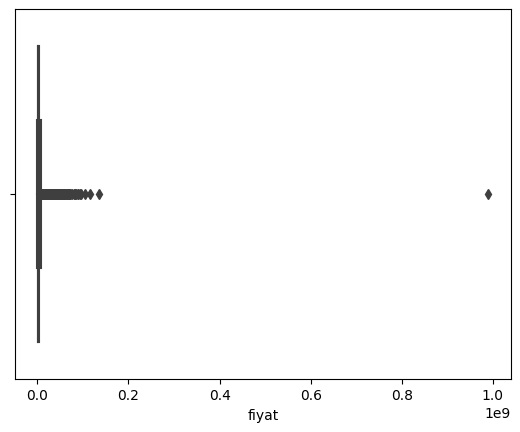

In [61]:
sns.boxplot(x=df.fiyat)

<AxesSubplot: xlabel='fiyat', ylabel='net_alan'>

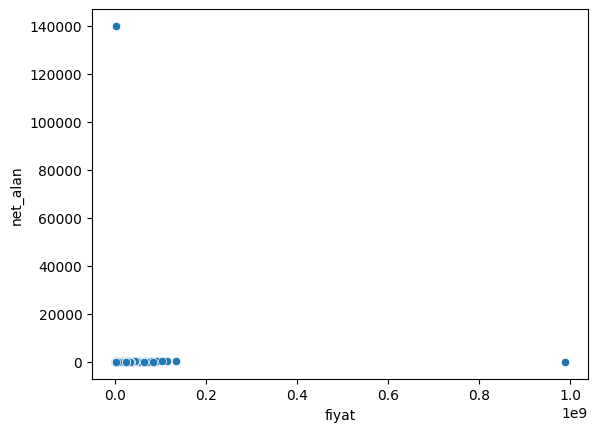

In [62]:
sns.scatterplot(data = df, x="fiyat", y="net_alan")

In [63]:
df = df[(df.net_alan < 1000)&(df.fiyat<200000000)]

<AxesSubplot: xlabel='fiyat', ylabel='net_alan'>

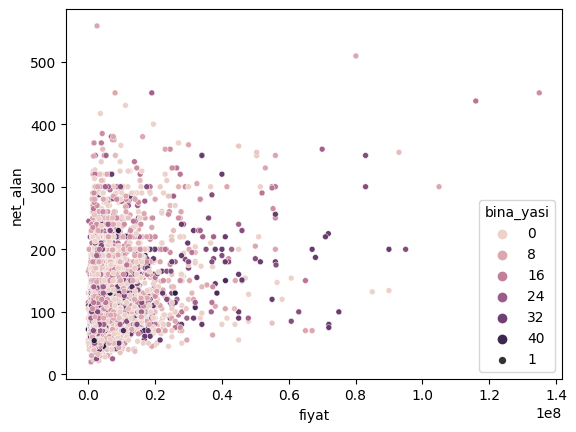

In [66]:
sns.scatterplot(data = df, x="fiyat", y="net_alan",hue="bina_yasi",size =1)

In [67]:
df = df[(df.net_alan < 400)&(df.fiyat<60000000)]

<AxesSubplot: xlabel='fiyat', ylabel='net_alan'>

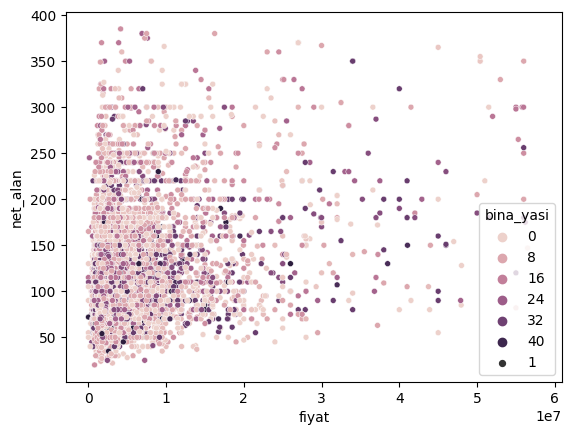

In [154]:
sns.scatterplot(data = df, x="fiyat", y="net_alan",hue="bina_yasi",size=1)


In [163]:
df0to100=df[(df.net_alan<=100)]

In [164]:
Q1 = np.percentile(df0to100['fiyat'], 38,
                   method = 'midpoint')
 
Q3 = np.percentile(df0to100['fiyat'], 62,
                   method = 'midpoint')
IQR = Q3 - Q1

upper = Q3 +1.5*IQR
lower = Q1 - 1.5*IQR

print(upper,lower)

3650000.0 450000.0


In [165]:
df100to150=df[(df.net_alan>100)&(df.net_alan<=150)]

In [171]:
Q1 = np.percentile(df100to200['fiyat'], 39,
                   method = 'midpoint')
 
Q3 = np.percentile(df100to200['fiyat'], 61,
                   method = 'midpoint')
IQR = Q3 - Q1

upper = Q3 +1.5*IQR
lower = Q1 - 1.5*IQR

print(upper,lower)

4750000.0 750000.0


In [167]:
df150to200=df[(df.net_alan>150)&(df.net_alan<=200)]

In [170]:
Q1 = np.percentile(df150to200['fiyat'], 40,
                   method = 'midpoint')
 
Q3 = np.percentile(df150to200['fiyat'], 60,
                   method = 'midpoint')
IQR = Q3 - Q1

upper = Q3 +1.5*IQR
lower = Q1 - 1.5*IQR

print(upper,lower)

6230000.0 950000.0


In [172]:
df200to250=df[(df.net_alan>200)&(df.net_alan<=250)]

In [184]:
Q1 = np.percentile(df200to250['fiyat'], 42,
                   method = 'midpoint')
 
Q3 = np.percentile(df200to250['fiyat'], 58,
                   method = 'midpoint')
IQR = Q3 - Q1

upper = Q3 +1.5*IQR
lower = Q1 - 1.5*IQR

print(upper,lower)

7975000.0 975000.0


In [185]:
df250plus=df[(df.net_alan>250)]

In [204]:
Q1 = np.percentile(df250plus['fiyat'], 44,
                   method = 'midpoint')
 
Q3 = np.percentile(df250plus['fiyat'], 56,
                   method = 'midpoint')
IQR = Q3 - Q1

upper = Q3 +1.5*IQR
lower = Q1 - 1.5*IQR

print(upper,lower)

15625000.0 2625000.0


In [205]:
x1 = df0to100[(df0to100.fiyat<3650000)&(df0to100.fiyat>450000)]

In [206]:
x2 = df100to150[(df100to150.fiyat<4750000)&(df100to150.fiyat>750000)]

In [207]:
x3 = df150to200[(df150to200.fiyat<6230000)&(df150to200.fiyat>950000)]

In [208]:
x4 = df200to250[(df200to250.fiyat<7975000)&(df200to250.fiyat>975000)]

In [209]:
x5 = df250plus[(df250plus.fiyat<15625000)&(df250plus.fiyat>2625000)]

In [218]:
new_df = pd.concat([x1,x2,x3,x4])

<AxesSubplot: xlabel='fiyat', ylabel='net_alan'>

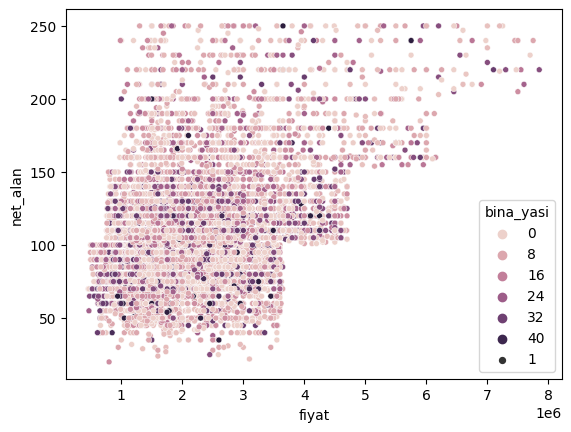

In [219]:
sns.scatterplot(data = new_df, x="fiyat", y="net_alan",hue="bina_yasi",size=1)


In [220]:
new_df = new_df.reset_index(drop=True)

In [222]:
new_df

,net_alan,brut_alan,kredi_durumu,kat_sayisi,isitma,bulundugu_kat,bina_yasi,esya,kullanim_durumu,fiyat,il,ilce,mahalle,oda_sayisi,toplam_oda_sayisi,lat,lng
0,100,110,1,3,2,3,33,2,0,2750000,İstanbul,Adalar,Heybeliada,3 + 1,4,40.874166,29.129325
1,70,75,1,4,2,2,28,1,0,2250000,İstanbul,Adalar,Heybeliada,2 + 1,3,40.874166,29.129325
2,80,90,1,3,2,3,38,0,2,3500000,İstanbul,Adalar,Nizam,2 + 1,3,40.874166,29.129325
3,56,80,1,3,2,2,28,4,0,2800000,İstanbul,Adalar,Heybeliada,2 + 1,3,40.874166,29.129325
4,70,75,0,4,2,0,28,0,1,3000000,İstanbul,Adalar,Heybeliada,2 + 1,3,40.874166,29.129325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11047,237,330,1,15,2,14,1,0,1,3900000,İstanbul,Zeytinburnu,Beştelsiz,3 + 1,4,40.989865,28.903747
11048,235,240,1,5,2,5,13,0,1,1350000,İstanbul,Zeytinburnu,Sümer,2 + 1,3,40.989865,28.903747
11049,230,250,1,4,3,4,8,0,1,2900000,İstanbul,Zeytinburnu,Nuripaşa,3 + 1,4,40.989865,28.903747
11050,250,265,1,4,2,2,4,0,3,7200000,İstanbul,Zeytinburnu,Seyitnizam,3 + 1,4,40.989865,28.903747


In [223]:
new_df.to_csv("../../data/zingat_ist_preprocessed.csv")